In [1]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

### Binomial proportion

In [8]:
n = 146
y = 57
phat = y / n
se = np.sqrt(phat * (1 - phat) / n)
print(f"phat = {phat:.2f}, se = {se:.2f}")

phat = 0.39, se = 0.04


### Central Limit Theorem (CLT)

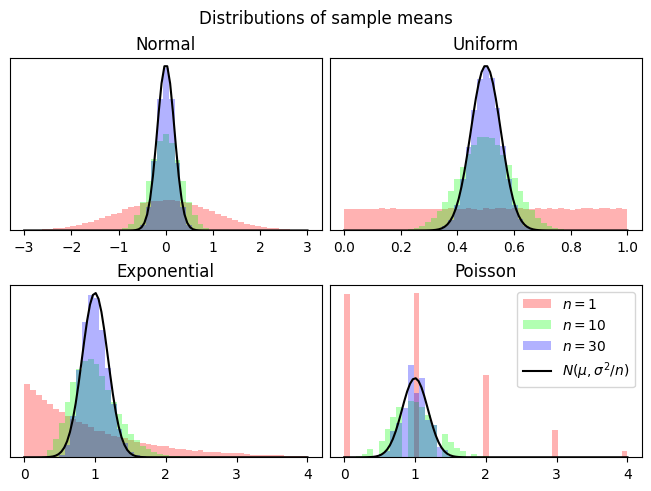

In [2]:
m = 100_000
fig, axes = plt.subplots(nrows=2, ncols=2, layout="constrained")
axes = axes.ravel()
plt.suptitle("Distributions of sample means")

ns = [1, 10, 30]
ds = [stats.norm(), stats.uniform(), stats.expon(), stats.poisson(1)]
cs = [(1, 0, 0, 0.3), (0, 1, 0, 0.3), (0, 0, 1, 0.3)]
lows = [-3, 0, 0, 0]
highs = [3, 1, 4, 4]
titles = ["Normal", "Uniform", "Exponential", "Poisson"]

for ax, d, low, high, title in zip(axes, ds, lows, highs, titles):
    bins = np.linspace(low, high, 50)
    for n, c in zip(ns, cs):
        x = d.rvs(size=(m, n))
        xbar = x.mean(axis=1)
        ax.hist(xbar, bins=bins, label=f"$n={n}$", color=c, density=True)
        ax.set_yticks([])
        ax.set_title(title)
    xbars = np.linspace(low, high, 100)
    norm = stats.norm(d.mean(), d.std() / np.sqrt(n))
    ax.plot(xbars, norm.pdf(xbars), "k", label="$N(\\mu, \\sigma^2/n)$")


axes[-1].legend()
plt.show()

### Confidence intervals for the mean

In [16]:
n = 146
y = 57
phat = y / n
se = np.sqrt(phat * (1 - phat) / n)
z95 = stats.norm().ppf(1 - 0.05 / 2)
lower = phat - z95 * se
upper = phat + z95 * se
print(f"lower = {lower:.2f}, upper = {upper:.2f}")

lower = 0.31, upper = 0.47


### Combining means and proportions

In [33]:
phat = 0.57
m = 400
qhat = 0.45
n = 600
sephat = np.sqrt(phat * (1 - phat) / m)
seqhat = np.sqrt(qhat * (1 - qhat) / n)
gap = phat - qhat
segap = np.sqrt(sephat**2 + seqhat**2)
z999 = stats.norm().ppf(1 - 0.001 / 2)
print(
    f"""\
phat = {phat:.2f}, sephat = {sephat:.2f}, 
qhat = {qhat:.2f}, seqhat = {seqhat:.2f}
gap = {gap:.2f}, segap = {segap:.2f}, 99.9%-CI = [{gap:.2f} ± {z999*segap:.2f}]
"""
)

phat = 0.57, sephat = 0.02, 
qhat = 0.45, seqhat = 0.02
gap = 0.12, segap = 0.03, 99.9%-CI = [0.12 ± 0.11]



ybar = 60.40
T = 3.70
pvalue = 0.07


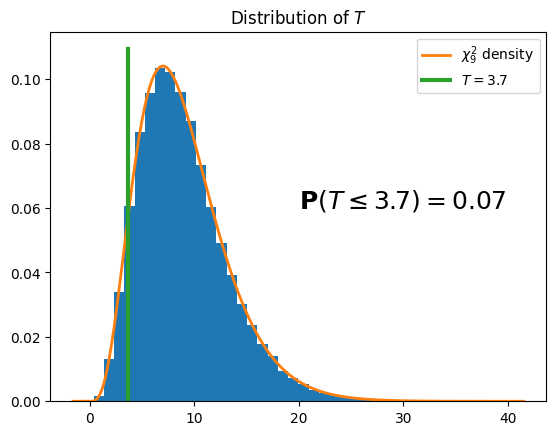

In [ ]:
m = 10
n = 100
y = np.array([61, 64, 54, 61, 59, 58, 65, 62, 61, 59])
ybar = y.mean()
T = (1 / ybar + 1 / (n - ybar)) * np.sum((y - ybar) ** 2)
print(f"ybar = {ybar:.2f}\nT = {T:.2f}")

r = 100_000
ys = stats.binom(n, 0.8).rvs(size=(r, m))
ybars = ys.mean(axis=1, keepdims=True)
c = 1 / (n - ybars) + 1 / ybars
d = np.sum((ys - ybars) ** 2, axis=1, keepdims=True)
Ts = c * d
pvalue = np.mean(Ts <= T)
print(f"pvalue = {pvalue:.2f}")

plt.hist(Ts, bins=40, density=True)
u = np.linspace(*plt.xlim(), 1000)
plt.plot(u, stats.chi2(m - 1).pdf(u), lw=2, label=f"$\\chi^2_{m - 1}$ density")  # type: ignore
plt.plot([T, T], plt.ylim(), lw=3, label=f"$T = {T:.1f}$")
plt.title("Distribution of $T$")
plt.text(
    20,
    0.06,
    f"$\\mathbf{{P}}(T \\leq {T:.1f}) = {stats.chi2(m - 1).cdf(T):.2f}$",
    fontsize=18,
)
plt.legend()
plt.show()